In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in Excel file to Pandas DataFrame
df = pd.read_excel('/content/CitiBikeShare Data April 2020.xlsx')

In [42]:
# Display the first few rows
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,534,2020-04-01 00:00:15.280,2020-04-01 00:09:09.873,3656,E 2 St & Avenue A,40.723077,-73.985836,545,E 23 St & 1 Ave,40.736502,-73.978095,15162,Subscriber,1990,Female,33
1,529,2020-04-01 00:02:28.943,2020-04-01 00:11:18.341,3163,Central Park West & W 68 St,40.773407,-73.977825,3301,Columbus Ave & W 95 St,40.791956,-73.968087,42861,Subscriber,1974,Male,49
2,1488,2020-04-01 00:02:56.090,2020-04-01 00:27:44.253,3164,Columbus Ave & W 72 St,40.777057,-73.978985,3605,31 Ave & Crescent St,40.765835,-73.926547,35989,Subscriber,1982,Male,41
3,341,2020-04-01 00:03:25.141,2020-04-01 00:09:06.319,3827,Halsey St & Broadway,40.685650,-73.915640,3869,Van Buren St & Broadway,40.692000,-73.926170,37548,Subscriber,1996,Male,27
4,2206,2020-04-01 00:05:35.279,2020-04-01 00:42:21.908,3890,Grove St & Broadway,40.690470,-73.923511,3058,Lewis Ave & Kosciuszko St,40.692371,-73.937054,39701,Subscriber,1977,Male,46


In [35]:
# Display summary stats
print(df[['birth year', 'tripduration', 'gender']].describe())

          birth year  tripduration
count  682762.000000  6.827620e+05
mean     1979.859037  1.613020e+03
std        12.235537  1.938539e+04
min      1885.000000  6.100000e+01
25%      1969.000000  4.740000e+02
50%      1983.000000  9.700000e+02
75%      1990.000000  1.677000e+03
max      2004.000000  3.786187e+06


In [5]:
# Check for missing values
print(df.isnull().sum())

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64


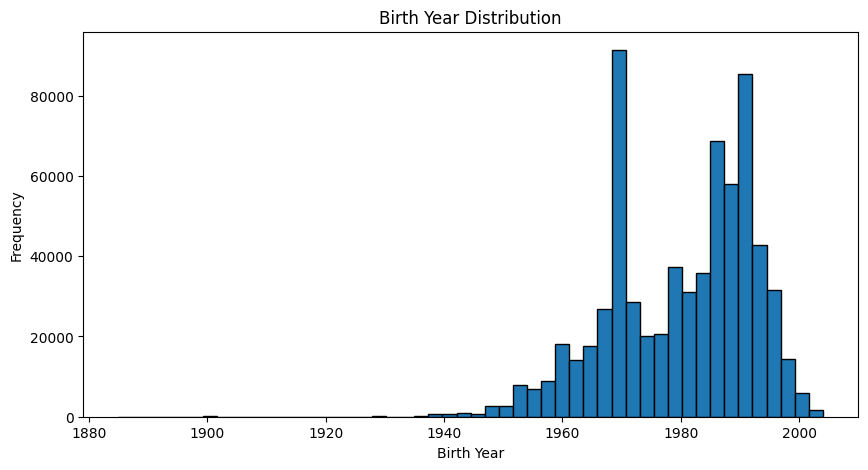

In [6]:
# Plotting the histogram for 'birth year'
plt.figure(figsize=(10, 5))
plt.hist(df['birth year'], bins=50, edgecolor='black')
plt.title('Birth Year Distribution')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Calculating skewness
birth_year_skewness = df['birth year'].skew()

print(f"Skewness of Birth Year: {birth_year_skewness}")

Skewness of Birth Year: -0.6977730487855615


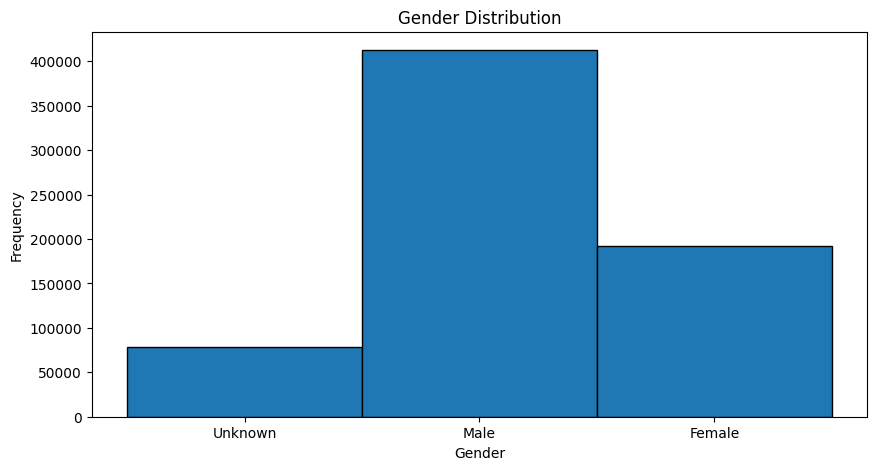

In [8]:
# Plotting the histogram for 'gender'
plt.figure(figsize=(10, 5))
plt.hist(df['gender'], bins=3, edgecolor='black', range=[-0.5, 2.5]) # to center the bars
plt.xticks([0, 1, 2], ['Unknown', 'Male', 'Female'])  # replace numbers with labels
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Calculating average birth year
avg_birth_year = round(df['birth year'].mean())

In [10]:
print(f"Average Birth Year: {avg_birth_year}")

Average Birth Year: 1980


Noticed an outlier in 1969, and many "unknown" gender entries. Filtering data to investigate outliers

In [11]:
# Filter the data for birth year 1969
df_1969 = df[df['birth year'] == 1969]

In [12]:
# Filter the data for unknown gender
df_unknown_gender = df[df['gender'] == 0]

Visualizing the data to check the distribution of gender in 1969, and the distribution of birth years in the unknown gender subset

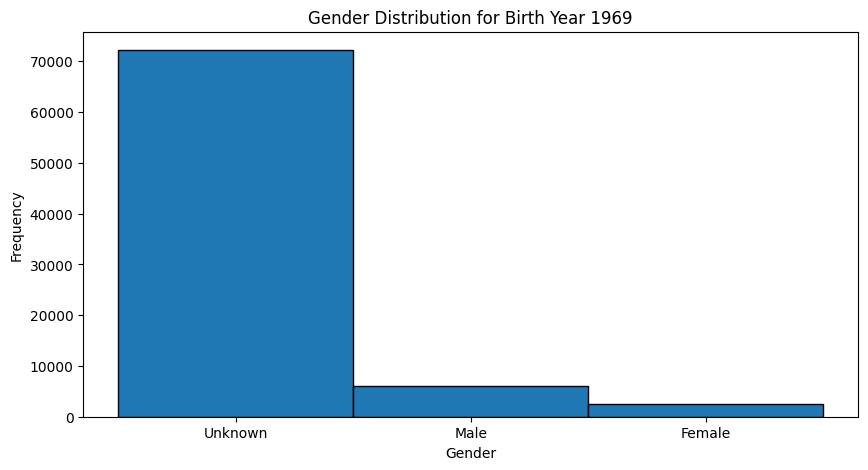

In [13]:
# Gender distribution for the 1969 subset
plt.figure(figsize=(10, 5))
plt.hist(df_1969['gender'], bins=3, edgecolor='black', range=[-0.5, 2.5]) # to center the bars
plt.xticks([0, 1, 2], ['Unknown', 'Male', 'Female'])  # replace numbers with labels
plt.title('Gender Distribution for Birth Year 1969')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

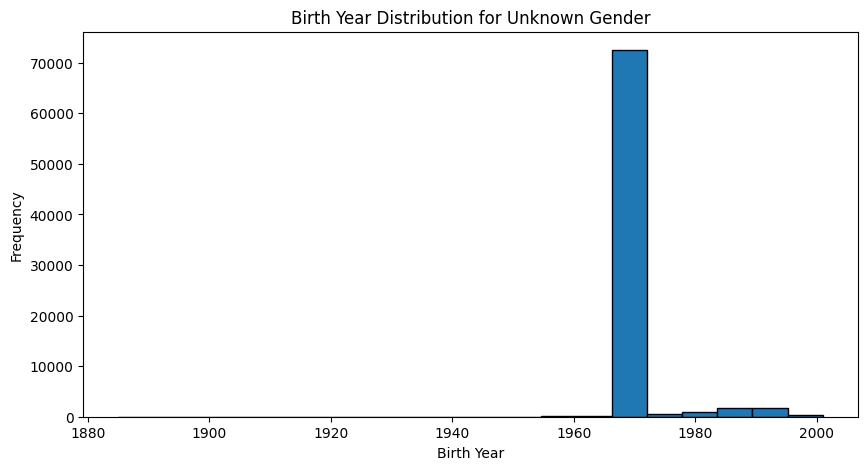

In [14]:
# Birth year distribution for the unknown gender subset
plt.figure(figsize=(10, 5))
plt.hist(df_unknown_gender['birth year'], bins=20, edgecolor='black')
plt.title('Birth Year Distribution for Unknown Gender')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

Compare the gender distributions for each year side-by-side

In [15]:
import plotly.express as px

# Convert the 'gender' column to categorical type for better readability
df['gender'] = df['gender'].replace({0: 'Unknown', 1: 'Male', 2: 'Female'})

# Create a DataFrame that counts the occurrences of each gender per year
df_gender_year = df.groupby(['birth year', 'gender']).size().reset_index(name='count')

# Create the stacked bar chart
fig = px.bar(df_gender_year, x='birth year', y='count', color='gender', title='Gender Distribution per Birth Year', labels={'count':'Count', 'birth year':'Birth Year'})
fig.show()

Show the percentage of unknown gender in 1969 vs total for every other year

In [16]:
# Total number of 'Unknown' gender entries
total_unknown = df[df['gender'] == 'Unknown'].shape[0]

# Number of 'Unknown' gender entries in 1969
unknown_1969 = df[(df['gender'] == 'Unknown') & (df['birth year'] == 1969)].shape[0]

# Calculate the percentage
percentage = round((unknown_1969 / total_unknown) * 100)

print(f"Percentage of 'Unknown' genders from the entire data set that are in birth year 1969: {percentage}%")

Percentage of 'Unknown' genders from the entire data set that are in birth year 1969: 92%


In [17]:
# Count the total number of entries and the number of 'Unknown' gender entries in each year
total_counts = df.groupby('birth year').size()
unknown_counts = df[df['gender'] == 'Unknown'].groupby('birth year').size()

In [18]:
# Calculate the percentages
percentages = (unknown_counts / total_counts * 100).fillna(0)

In [19]:
# Get the percentage for the year 1969
percentage_1969 = percentages[1969]

In [20]:
# Calculate the average percentage for the other years
average_percentage_other_years = percentages[percentages.index != 1969].mean()

In [21]:
# Display the results
print(f"Percentage of unknown gender in 1969: {percentage_1969}%")
print(f"Average percentage of unknown gender for the other years: {average_percentage_other_years}%")

Percentage of unknown gender in 1969: 89.40995865006066%
Average percentage of unknown gender for the other years: 4.355165470178158%


I have skewed data and outliers, so we should look at median and mode instead of mean as a measurement of central tendancy

In [22]:
# Calculate median for 'birth year'
birth_year_median = round(df['birth year'].median())
print(f"Median Birth Year: {birth_year_median}")

# Calculate mode for 'birth year'
birth_year_mode = df['birth year'].mode()[0]
print(f"Mode Birth Year: {birth_year_mode}")

# Calculate mode for 'gender'
gender_mode = df['gender'].mode()[0]
print(f"Mode Gender: {gender_mode}")

Median Birth Year: 1983
Mode Birth Year: 1969
Mode Gender: Male


**Filtering out the outliers**

In [30]:
# Create a DataFrame unknown gender records removed from 1969
outliers_removed = df[~((df['gender'] == 'Unknown') & (df['birth year'] == 1969))]

In [31]:
# Visualizing the data with the outliers removed
# Create a DataFrame that counts the occurrences of each gender per year
df_gender_year = outliers_removed.groupby(['birth year', 'gender']).size().reset_index(name='count')

# Create the stacked bar chart
fig = px.bar(df_gender_year, x='birth year', y='count', color='gender', title='Gender Distribution per Birth Year', labels={'count':'Count', 'birth year':'Birth Year'})
fig.show()

Calculating summary stats with outliers removed

In [ ]:
# Calculating skewness of the filtered data
filtered_birth_year_skewness = outliers_removed['birth year'].skew()

print(f"Skewness of Birth Year: {filtered_birth_year_skewness}")

In [34]:
# Calculate median for 'birth year'
birth_year_median = round(outliers_removed['birth year'].median())
print(f"Median Birth Year: {birth_year_median}")

# Calculate mean for 'birth year'
birth_year_mean = round(outliers_removed['birth year'].mean())
print(f"Mean Birth Year: {birth_year_mean}")

# Calculate mode for 'birth year'
birth_year_mode = outliers_removed['birth year'].mode()[0]
print(f"Mode Birth Year: {birth_year_mode}")

# Calculate mode for 'gender'
gender_mode = outliers_removed['gender'].mode()[0]
print(f"Mode Gender: {gender_mode}")

Median Birth Year: 1985
Mean Birth Year: 1981
Mode Birth Year: 1990
Mode Gender: Male


#Visualizing trip metrics

Calculate the numer of trips and average trip duration

In [23]:
# Group the data by start station id and calculate the number of trips and average trip duration
station_stats = df.groupby('start station id').agg(
{'tripduration': ['count', 'mean'], 'start station latitude': 'first', 'start station longitude': 'first', 'start station name': 'first'}).reset_index()

# Flatten the column names
station_stats.columns = ['start station id', 'trip count', 'average trip duration', 'latitude', 'longitude', 'start station name']

In [24]:
# Sort by trip count and select the top 10 stations
top_stations = station_stats.sort_values('trip count', ascending=False).head(10)

In [26]:
# Calculate the average latitude and longitude
average_latitude = top_stations['latitude'].mean()
average_longitude = top_stations['longitude'].mean()

Visualize the selected locations on a map

In [27]:
import folium

# Create a base map
m = folium.Map(location=[average_latitude, average_longitude], zoom_start=13)

# Add markers to the map
for idx, row in top_stations.iterrows():
    folium.Marker([row['latitude'], row['longitude']],
                  popup=f"Station: {row['start station name']}<br>Trips: {row['trip count']}<br>Avg duration: {row['average trip duration']:.2f}").add_to(m)

# Display the map
m

**Top 25 locations by trip count**

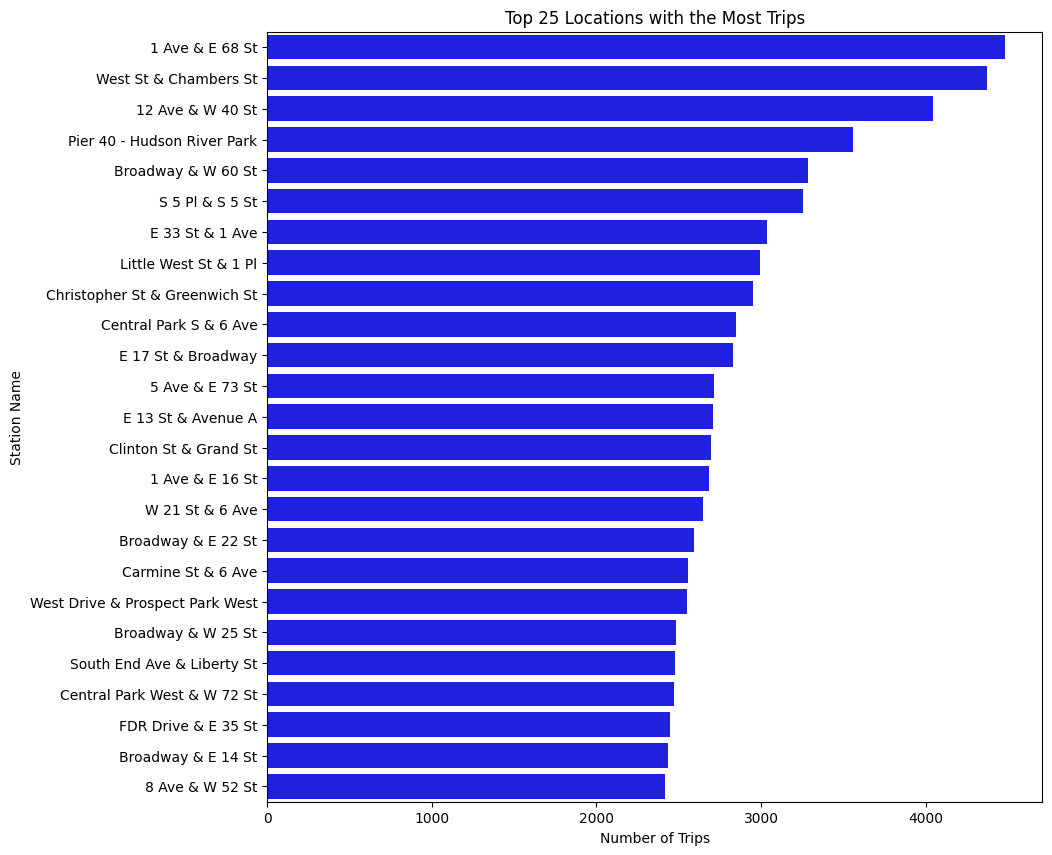

In [28]:
import seaborn as sns

# Calculate top 25 stations by trip count
top_25_stations = station_stats.sort_values('trip count', ascending=False).head(25)

# Create the bar chart
plt.figure(figsize=(10,10))
sns.barplot(x='trip count', y='start station name', data=top_25_stations, color='b')
plt.xlabel('Number of Trips')
plt.ylabel('Station Name')
plt.title('Top 25 Locations with the Most Trips')
plt.show()

**Number of trips and average trip duration**

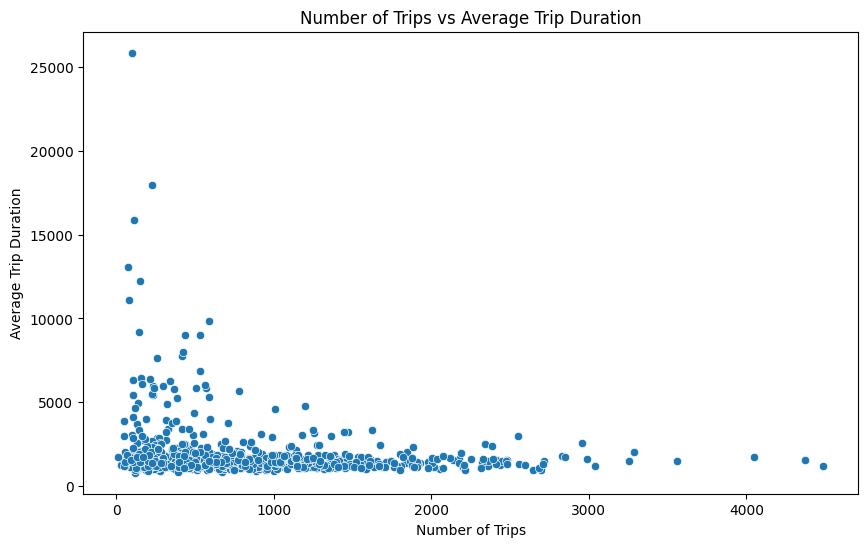

In [29]:
# Create a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='trip count', y='average trip duration', data=station_stats)
plt.xlabel('Number of Trips')
plt.ylabel('Average Trip Duration')
plt.title('Number of Trips vs Average Trip Duration')
plt.show()

**Add age column**

In [ ]:
# Import the datetime module
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Calculate age by subtracting birth year from current year
# and add it as a new column to the DataFrame
outliers_removed['age'] = current_year - outliers_removed['birth year']

In [44]:
# Display the first few rows with the added 'age' column
outliers_removed.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,534,2020-04-01 00:00:15.280,2020-04-01 00:09:09.873,3656,E 2 St & Avenue A,40.723077,-73.985836,545,E 23 St & 1 Ave,40.736502,-73.978095,15162,Subscriber,1990,Female,33
1,529,2020-04-01 00:02:28.943,2020-04-01 00:11:18.341,3163,Central Park West & W 68 St,40.773407,-73.977825,3301,Columbus Ave & W 95 St,40.791956,-73.968087,42861,Subscriber,1974,Male,49
2,1488,2020-04-01 00:02:56.090,2020-04-01 00:27:44.253,3164,Columbus Ave & W 72 St,40.777057,-73.978985,3605,31 Ave & Crescent St,40.765835,-73.926547,35989,Subscriber,1982,Male,41
3,341,2020-04-01 00:03:25.141,2020-04-01 00:09:06.319,3827,Halsey St & Broadway,40.685650,-73.915640,3869,Van Buren St & Broadway,40.692000,-73.926170,37548,Subscriber,1996,Male,27
4,2206,2020-04-01 00:05:35.279,2020-04-01 00:42:21.908,3890,Grove St & Broadway,40.690470,-73.923511,3058,Lewis Ave & Kosciuszko St,40.692371,-73.937054,39701,Subscriber,1977,Male,46


In [45]:
# Calculate average age for each gender
average_age_by_gender = round(outliers_removed.groupby('gender')['age'].mean())

print(average_age_by_gender)

gender
Female     41.0
Male       42.0
Unknown    39.0
Name: age, dtype: float64
